# Coding project - Picture enhancement

Write code that automatically enhances a photograph.

<img src="etretat.jpg" width="250px" />
<img src="ex_enhance.jpg" width="250px" />

"Enhance" may mean a lot of different things, and we encourage you to be creative in which enhancements you want to implement.

Some possibilities include (not an exhaustive list):

* Noise reduction
* Auto-level
* Gamma correction (with gamma provided by the user or automatically determined from the image histogram)
* Increase colour saturation
* ...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m


from skimage import color
from skimage.io import imread, imshow, imsave
from skimage.color import rgb2hsv , hsv2rgb
from matplotlib import cm
from skimage.filters.rank import mean, median
from skimage.morphology import disk


%matplotlib inline

In [2]:
im = imread('etretat.jpg')
im2 = im.copy()


C:\Users\Moi\AppData\Local\Temp\ipykernel_15020\2661609252.py:7: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  smoothed_hue = mean(hue, d)
C:\Users\Moi\AppData\Local\Temp\ipykernel_15020\2661609252.py:8: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  smoothed_sat = mean(sat, d)
C:\Users\Moi\AppData\Local\Temp\ipykernel_15020\2661609252.py:9: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  smoothed_val = mean(val, d)
C:\Users\Moi\AppData\Local\Temp\ipykernel_15020\2661609252.py:11: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filt

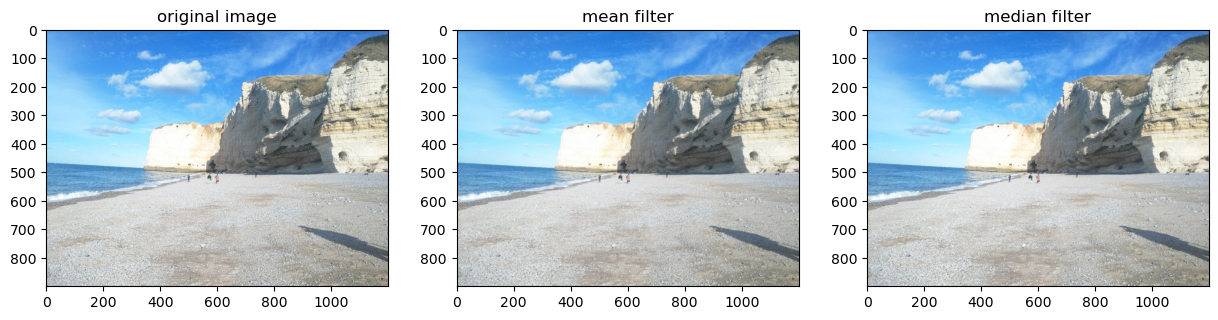

In [3]:
def noise_reduction(image, method='median', radius=1) :
    hsv = color.rgb2hsv(image)
    hue, sat, val = hsv[:,:,0], hsv[:,:,1], hsv[:,:,2]
    d = disk(radius)

    if method == 'mean' :
        smoothed_hue = mean(hue, d)
        smoothed_sat = mean(sat, d)
        smoothed_val = mean(val, d)
    elif method == 'median' :
        smoothed_hue = median(hue, d)
        smoothed_sat = median(sat, d)
        smoothed_val = median(val, d)
    smoothed_im = np.dstack((smoothed_hue, smoothed_sat, smoothed_val))
    return color.hsv2rgb(smoothed_im)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(im2)
plt.title('original image')
plt.subplot(1,3,2)
plt.imshow(noise_reduction(im, method='mean'))
plt.title('mean filter')
plt.subplot(1,3,3)
plt.imshow(noise_reduction(im, method='median'))
plt.title('median filter')
plt.show()


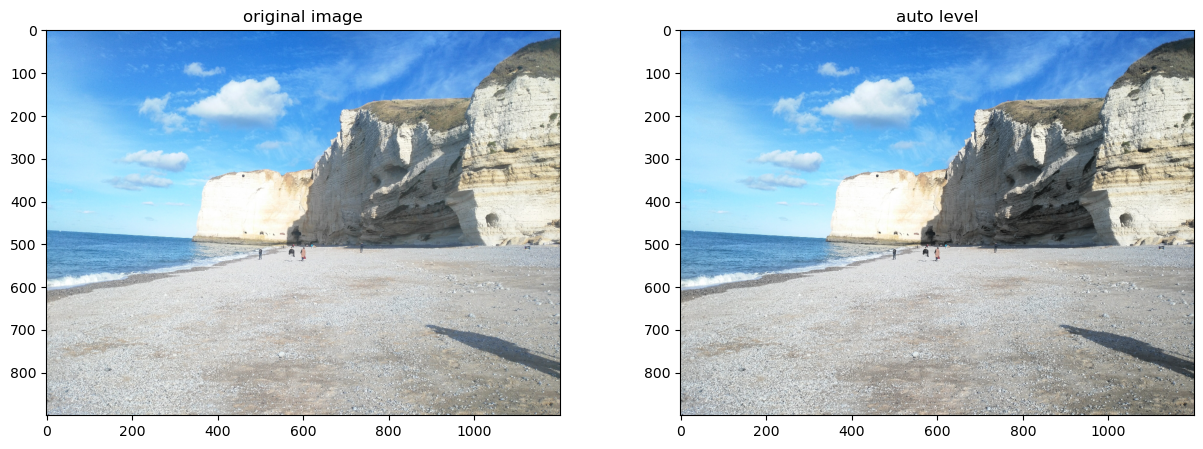

In [4]:
#auto level

def auto_level(image) :
    hsv = color.rgb2hsv(image)
    hue, sat, val = hsv[:,:,0], hsv[:,:,1], hsv[:,:,2]
    val = (val - val.min()) / (val.max() - val.min())
    hsv = np.dstack((hue, sat, val))
    return color.hsv2rgb(hsv)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(im2)
plt.title('original image')
plt.subplot(1,2,2)
plt.imshow(auto_level(im))
plt.title('auto level')
plt.show()

Text(0.5, 1.0, 'gamma = 1  correction')

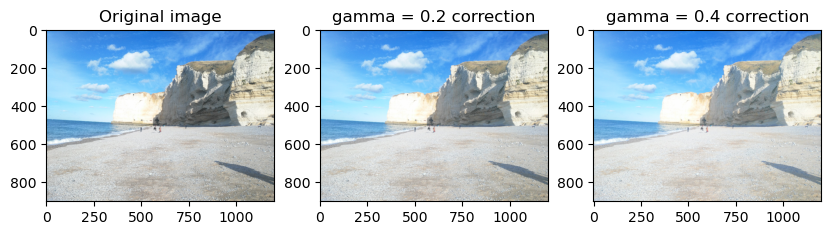

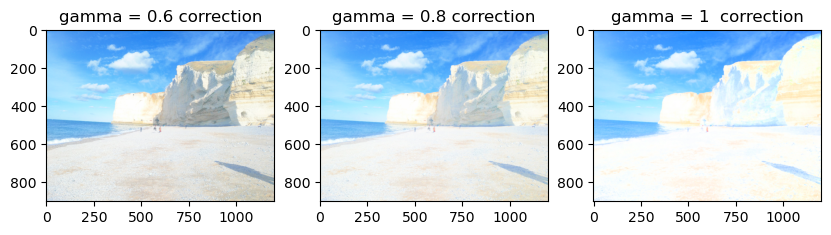

In [5]:
#create a gamma correction function

def gamma_correction(image, gamma):
    hsv = color.rgb2hsv(image)
    hue, sat, val = hsv[:,:,0], hsv[:,:,1], hsv[:,:,2]
    val_gamma = val**(1-gamma)

    hsv_gamma = np.dstack([hue, sat, val_gamma])
    im_gamma = color.hsv2rgb(hsv_gamma)    

    return im_gamma

#apply the gamma correction function
im_gamma_2 = gamma_correction(im, 0.2)
im_gamma_4 = gamma_correction(im, 0.4)
im_gamma_6 = gamma_correction(im, 0.6)
im_gamma_8 = gamma_correction(im, 0.8)
im_gamma_10 = gamma_correction(im, 1)


#display the result
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(im2)
plt.title('Original image')
plt.subplot(1,3,2)
plt.imshow(im_gamma_2)
plt.title('gamma = 0.2 correction')
plt.subplot(1,3,3)
plt.imshow(im_gamma_4)
plt.title('gamma = 0.4 correction')


plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(im_gamma_6)
plt.title('gamma = 0.6 correction')
plt.subplot(1,3,2)
plt.imshow(im_gamma_8)
plt.title('gamma = 0.8 correction')
plt.subplot(1,3,3)
plt.imshow(im_gamma_10)
plt.title('gamma = 1  correction')



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


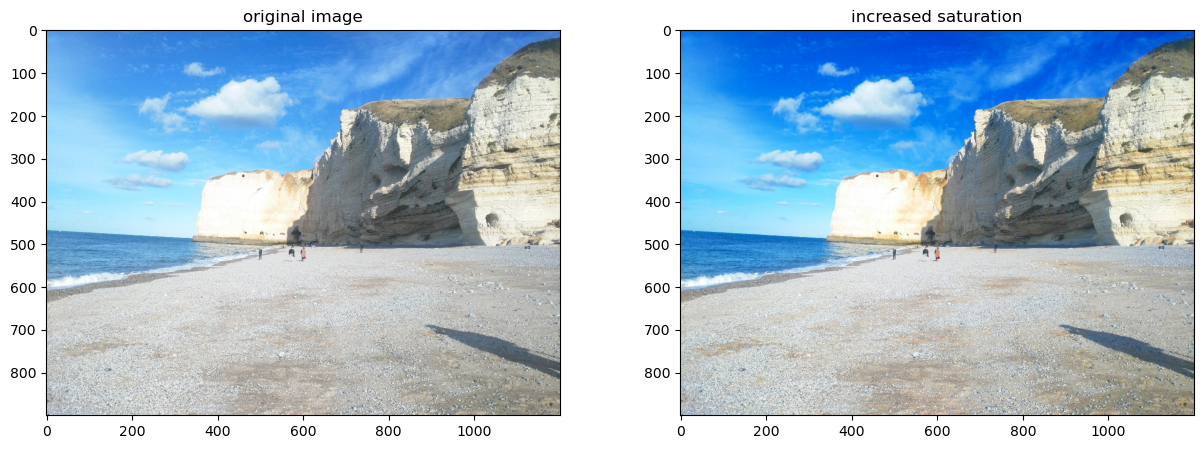

In [6]:
#increase saturation

def increase_saturation(image, factor) :
    hsv = color.rgb2hsv(image)
    hue, sat, val = hsv[:,:,0], hsv[:,:,1], hsv[:,:,2]
    sat = sat * factor
    hsv = np.dstack((hue, sat, val))
    return color.hsv2rgb(hsv)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(im2)
plt.title('original image')
plt.subplot(1,2,2)
plt.imshow(increase_saturation(im, 1.5))
plt.title('increased saturation')
plt.show()


C:\Users\Moi\AppData\Local\Temp\ipykernel_15020\2661609252.py:11: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  smoothed_hue = median(hue, d)
C:\Users\Moi\AppData\Local\Temp\ipykernel_15020\2661609252.py:12: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  smoothed_sat = median(sat, d)
C:\Users\Moi\AppData\Local\Temp\ipykernel_15020\2661609252.py:13: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  smoothed_val = median(val, d)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


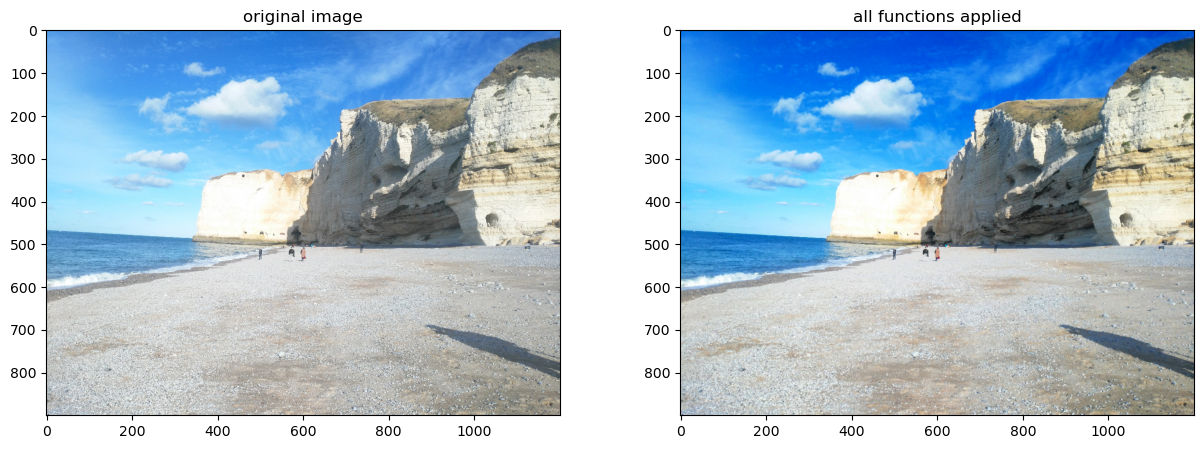

In [7]:
#apply all the functions

def apply_all(image) :
    image = noise_reduction(image, method='median')
    image = auto_level(image)
    image = gamma_correction(image, 0.2)
    image = increase_saturation(image, 1.5)
    return image

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(im2)
plt.title('original image')
plt.subplot(1,2,2)
plt.imshow(apply_all(im))
plt.title('all functions applied')
plt.show()
